In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Sample input data (features)
X = pd.DataFrame({
    'Size': [2000, 1500, 2500, 1800],
    'Bedrooms': [3, 2, 4, 3],
    'Bathrooms': [2, 1, 3, 2],
    'Location': ['Suburb A', 'Suburb B', 'Suburb A', 'Suburb C'],
    'Age': [10, 5, 20, 15],
    'Lot Size': [0.25, 0.15, 0.30, 0.20]
})

# One-hot encode the categorical variable 'Location'
X = pd.get_dummies(X, columns=['Location'], drop_first=True)

# Sample output data (target variables: Sale Price, Time on Market, Rental Price)
y = pd.DataFrame({
    'Sale Price': [350000, 250000, 450000, 300000],
    'Time on Market': [30, 15, 45, 20],
    'Rental Price': [2000, 1500, 2500, 1800]
})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize/Standardize the input features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a simple neural network model for multiple outputs
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Input layer
    keras.layers.Dense(64, activation='relu'),  # Hidden layer
    keras.layers.Dense(y_train.shape[1])  # Output layer for multiple targets (Sale Price, Time on Market, Rental Price)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Make predictions on the test data
predictions = model.predict(X_test_scaled)

# Output predictions
print("Predictions:\n", predictions)

# Optionally, compare predictions to actual test set values
print("\nActual values:\n", y_test.values)





Epoch 1/100

1/1 [==============================] - 1s 701ms/step - loss: 35417890816.0000 - val_loss: 67502002176.0000
Epoch 2/100
1/1 [==============================] - 0s 28ms/step - loss: 35417874432.0000 - val_loss: 67501993984.0000
Epoch 3/100
1/1 [==============================] - 0s 25ms/step - loss: 35417858048.0000 - val_loss: 67501993984.0000
Epoch 4/100
1/1 [==============================] - 0s 28ms/step - loss: 35417845760.0000 - val_loss: 67501981696.0000
Epoch 5/100
1/1 [==============================] - 0s 27ms/step - loss: 35417829376.0000 - val_loss: 67501981696.0000
Epoch 6/100
1/1 [==============================] - 0s 27ms/step - loss: 35417817088.0000 - val_loss: 67501977600.0000
Epoch 7/100
1/1 [==============================] - 0s 27ms/step - loss: 35417800704.0000 - val_loss: 67501977600.0000
Epoch 8/100
1/1 [==============================] - 0s 27ms/step - loss: 35417788416.0000 - val_loss: 67501961216.0000
Epoch 9/100
1/1 [==============================] - 

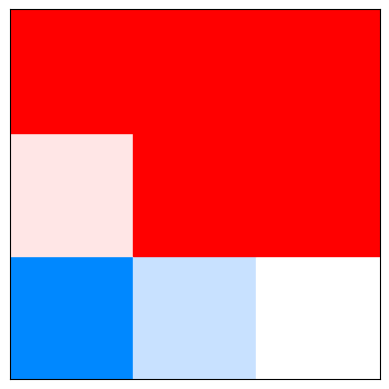

In [6]:
import matplotlib.pyplot as plt

# Define your custom RGB color list (normalized from 0-255 to 0-1)
custom_colors = [
    (0/255, 136/255, 255/255),   # RGB: (0, 136, 255) - Blue
    (200/255, 225/255, 255/255), # RGB: (200, 225, 255) - Light Blue
    (255/255, 255/255, 255/255), # RGB: (255, 255, 255) - White
    (255/255, 230/255, 230/255), # RGB: (255, 230, 230) - Light Pink
    (255/255, 0/255, 0/255)      # RGB: (255, 0, 0) - Red
]

# Define a 3x3 grid
fig, ax = plt.subplots()

# Create the 3x3 grid and color each rectangle
for i in range(3):
    for j in range(3):
        # Calculate index for the color in custom_colors list
        color_index = i * 3 + j if i * 3 + j < len(custom_colors) else len(custom_colors) - 1
        
        # Draw a rectangle at the right position and assign the custom color
        rect = plt.Rectangle((j, i), 1, 1, color=custom_colors[color_index])
        ax.add_patch(rect)

# Adjust the axes to fit the rectangles correctly
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)

# Remove axis labels and ticks for a cleaner look
ax.set_xticks([])
ax.set_yticks([])

# Display the plot
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


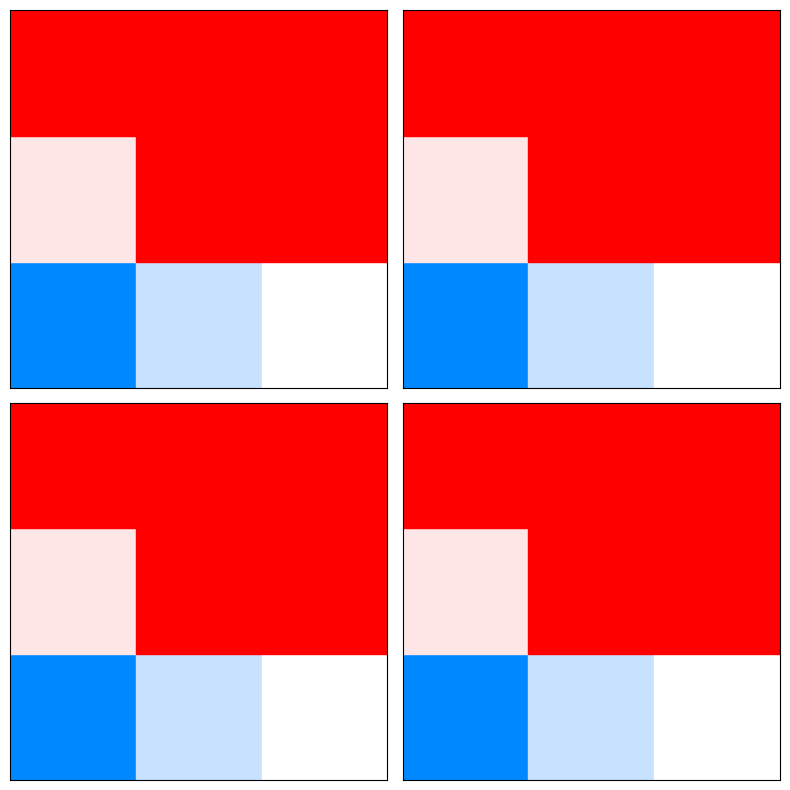

In [7]:
import matplotlib.pyplot as plt

# Define your custom RGB color list (normalized from 0-255 to 0-1)
custom_colors = [
    (0/255, 136/255, 255/255),   # Blue
    (200/255, 225/255, 255/255), # Light Blue
    (255/255, 255/255, 255/255), # White
    (255/255, 230/255, 230/255), # Light Pink
    (255/255, 0/255, 0/255)      # Red
]

# Function to create a 3x3 grid with the provided colors
def plot_color_matrix(ax, colors):
    for i in range(3):
        for j in range(3):
            color_index = i * 3 + j if i * 3 + j < len(colors) else len(colors) - 1
            rect = plt.Rectangle((j, i), 1, 1, color=colors[color_index])
            ax.add_patch(rect)
    ax.set_xlim(0, 3)
    ax.set_ylim(0, 3)
    ax.set_xticks([])
    ax.set_yticks([])

# Create a figure with multiple subplots (e.g., 2x2 grid of color matrices)
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# Plot the color matrices on each subplot
for ax in axs.flat:
    plot_color_matrix(ax, custom_colors)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the canvas with all the subplots
plt.show()


In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample DataFrame with 8 color columns (RGB values) and 1 description column
data = {
    'Color1': [(0, 136, 255), (255, 0, 0), (200, 225, 255)],  # RGB values
    'Color2': [(200, 225, 255), (255, 255, 255), (255, 230, 230)],
    'Color3': [(255, 255, 255), (0, 136, 255), (0, 136, 255)],
    'Color4': [(255, 230, 230), (200, 225, 255), (255, 0, 0)],
    'Color5': [(255, 0, 0), (255, 230, 230), (200, 225, 255)],
    'Color6': [(0, 136, 255), (255, 0, 0), (255, 255, 255)],
    'Color7': [(200, 225, 255), (0, 136, 255), (255, 230, 230)],
    'Color8': [(255, 255, 255), (255, 230, 230), (0, 136, 255)],
    'Description': ['Set 1', 'Set 2', 'Set 3']
}

df = pd.DataFrame(data)


custom_colors = {
    -2: (0/255, 136/255, 255/255),   # Blue
    -1: (200/255, 225/255, 255/255), # Light Blue
    0: (255/255, 255/255, 255/255), # White
    1: (255/255, 230/255, 230/255), # Light Pink
    2: (255/255, 0/255, 0/255)      # Red
    }

for col in df.columns[:-1]:
    df[col] = custom_colors[df[col]]
    

# # Normalize RGB values (0-255 to 0-1)
# def normalize_rgb(rgb):
#     return tuple([x / 255 for x in rgb])

# for col in df.columns[:-1]:  # Skip the Description column
#     df[col] = df[col].apply(normalize_rgb)

# Function to plot color grids based on the DataFrame
def plot_color_matrices_from_df(df):
    n_rows = df.shape[0]
    
    # Create subplots based on the number of rows in the DataFrame
    fig, axs = plt.subplots(n_rows, 1, figsize=(6, n_rows * 3))
    
    if n_rows == 1:
        axs = [axs]  # Ensure axs is iterable when there is only one row
    
    # Loop through each row in the DataFrame
    for i, row in df.iterrows():
        # Extract the color values from the first 8 columns
        colors = row[:-1].tolist()  # All columns except the description
        
        # Plot the color grid
        for j in range(3):
            for k in range(3):
                color_index = j * 3 + k
                # Repeat last color if there are only 8 colors
                rect = plt.Rectangle((k, j), 1, 1, color=colors[color_index] if color_index < len(colors) else colors[-1])
                axs[i].add_patch(rect)
        
        # Set limits and remove ticks
        axs[i].set_xlim(0, 3)
        axs[i].set_ylim(0, 3)
        axs[i].set_xticks([])
        axs[i].set_yticks([])
        
        # Add the description below the grid
        axs[i].text(1.5, -0.5, row['Description'], ha='center', fontsize=12)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

# Plot color matrices from the DataFrame
plot_color_matrices_from_df(df)


TypeError: unhashable type: 'Series'

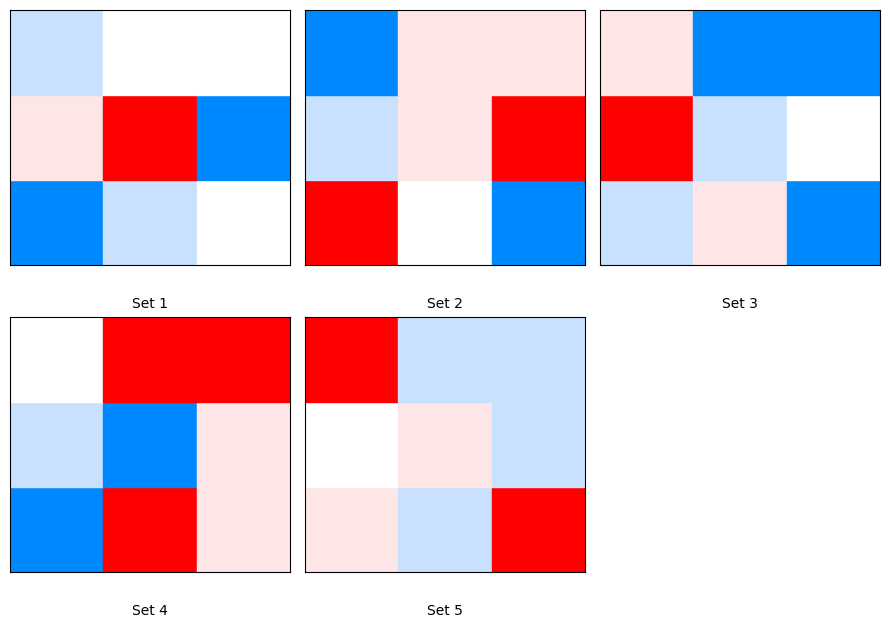

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import math

# Sample DataFrame with 8 color columns (RGB values) and 1 description column
data = {
    'Color1': [(0, 136, 255), (255, 0, 0), (200, 225, 255), (0, 136, 255), (255, 230, 230)],
    'Color2': [(200, 225, 255), (255, 255, 255), (255, 230, 230), (255, 0, 0), (200, 225, 255)],
    'Color3': [(255, 255, 255), (0, 136, 255), (0, 136, 255), (255, 230, 230), (255, 0, 0)],
    'Color4': [(255, 230, 230), (200, 225, 255), (255, 0, 0), (200, 225, 255), (255, 255, 255)],
    'Color5': [(255, 0, 0), (255, 230, 230), (200, 225, 255), (0, 136, 255), (255, 230, 230)],
    'Color6': [(0, 136, 255), (255, 0, 0), (255, 255, 255), (255, 230, 230), (200, 225, 255)],
    'Color7': [(200, 225, 255), (0, 136, 255), (255, 230, 230), (255, 255, 255), (255, 0, 0)],
    'Color8': [(255, 255, 255), (255, 230, 230), (0, 136, 255), (255, 0, 0), (200, 225, 255)],
    'Description': ['Set 1', 'Set 2', 'Set 3', 'Set 4', 'Set 5']
}

df = pd.DataFrame(data)

# Normalize RGB values (0-255 to 0-1)
def normalize_rgb(rgb):
    return tuple([x / 255 for x in rgb])

for col in df.columns[:-1]:  # Skip the Description column
    df[col] = df[col].apply(normalize_rgb)

# Function to plot color matrices from DataFrame in a grid
def plot_color_matrices_in_grid(df):
    n_rows = df.shape[0]
    
    # Set grid dimensions based on number of rows in the DataFrame (e.g., sqrt(n_rows) by sqrt(n_rows))
    grid_size = math.ceil(math.sqrt(n_rows))  # The number of rows/columns for a square grid

    # Create subplots with the calculated grid size
    fig, axs = plt.subplots(grid_size, grid_size, figsize=(grid_size * 3, grid_size * 3))
    
    axs = axs.flatten()  # Flatten the axes array for easier iteration

    # Loop through each row in the DataFrame
    for i, row in df.iterrows():
        # Extract the color values from the first 8 columns
        colors = row[:-1].tolist()  # All columns except the description
        
        # Plot the color grid on the corresponding subplot
        for j in range(3):
            for k in range(3):
                color_index = j * 3 + k
                # Repeat the last color to fill the 9th spot if there are only 8 colors
                rect = plt.Rectangle((k, j), 1, 1, color=colors[color_index] if color_index < len(colors) else colors[-1])
                axs[i].add_patch(rect)
        
        # Set limits and remove ticks
        axs[i].set_xlim(0, 3)
        axs[i].set_ylim(0, 3)
        axs[i].set_xticks([])
        axs[i].set_yticks([])
        
        # Add the description below the grid
        axs[i].text(1.5, -0.5, row['Description'], ha='center', fontsize=10)
    
    # Remove unused subplots (in case the grid is larger than the number of entries)
    for j in range(n_rows, len(axs)):
        fig.delaxes(axs[j])

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

# Plot color matrices in a grid from the DataFrame
plot_color_matrices_in_grid(df)


,Color1,Color2,Color3,Color4,Color5,Color6,Color7,Color8,Description
0,"(0.0, 0.5333333333333333, 1.0)","(0.7843137254901961, 0.8823529411764706, 1.0)","(1.0, 1.0, 1.0)","(1.0, 0.9019607843137255, 0.9019607843137255)","(1.0, 0.0, 0.0)","(0.0, 0.5333333333333333, 1.0)","(0.7843137254901961, 0.8823529411764706, 1.0)","(1.0, 1.0, 1.0)",Set 1
1,"(1.0, 0.0, 0.0)","(1.0, 1.0, 1.0)","(0.0, 0.5333333333333333, 1.0)","(0.7843137254901961, 0.8823529411764706, 1.0)","(1.0, 0.9019607843137255, 0.9019607843137255)","(1.0, 0.0, 0.0)","(0.0, 0.5333333333333333, 1.0)","(1.0, 0.9019607843137255, 0.9019607843137255)",Set 2
2,"(0.7843137254901961, 0.8823529411764706, 1.0)","(1.0, 0.9019607843137255, 0.9019607843137255)","(0.0, 0.5333333333333333, 1.0)","(1.0, 0.0, 0.0)","(0.7843137254901961, 0.8823529411764706, 1.0)","(1.0, 1.0, 1.0)","(1.0, 0.9019607843137255, 0.9019607843137255)","(0.0, 0.5333333333333333, 1.0)",Set 3
3,"(0.0, 0.5333333333333333, 1.0)","(1.0, 0.0, 0.0)","(1.0, 0.9019607843137255, 0.9019607843137255)","(0.7843137254901961, 0.8823529411764706, 1.0)","(0.0, 0.5333333333333333, 1.0)","(1.0, 0.9019607843137255, 0.9019607843137255)","(1.0, 1.0, 1.0)","(1.0, 0.0, 0.0)",Set 4
4,"(1.0, 0.9019607843137255, 0.9019607843137255)","(0.7843137254901961, 0.8823529411764706, 1.0)","(1.0, 0.0, 0.0)","(1.0, 1.0, 1.0)","(1.0, 0.9019607843137255, 0.9019607843137255)","(0.7843137254901961, 0.8823529411764706, 1.0)","(1.0, 0.0, 0.0)","(0.7843137254901961, 0.8823529411764706, 1.0)",Set 5


In [14]:
import pandas as pd

# Define your custom color map
custom_colors = {
    -2: (0/255, 136/255, 255/255),   # Blue
    -1: (200/255, 225/255, 255/255), # Light Blue
    0: (255/255, 255/255, 255/255),  # White
    1: (255/255, 230/255, 230/255),  # Light Pink
    2: (255/255, 0/255, 0/255)       # Red
}

# Example DataFrame with float values
data = {0: [-2.0, -1.0, 0.0, 1.0, 2.0]}  # Column with float values
df = pd.DataFrame(data)

# Convert to integer if necessary
df[0] = df[0].astype(int)

# Apply the color map to column 0
df['colors'] = df[0].map(custom_colors)

# Display the DataFrame
print(df)
df


   0                                         colors
0 -2                 (0.0, 0.5333333333333333, 1.0)
1 -1  (0.7843137254901961, 0.8823529411764706, 1.0)
2  0                                (1.0, 1.0, 1.0)
3  1  (1.0, 0.9019607843137255, 0.9019607843137255)
4  2                                (1.0, 0.0, 0.0)


,0,colors
0,-2,"(0.0, 0.5333333333333333, 1.0)"
1,-1,"(0.7843137254901961, 0.8823529411764706, 1.0)"
2,0,"(1.0, 1.0, 1.0)"
3,1,"(1.0, 0.9019607843137255, 0.9019607843137255)"
4,2,"(1.0, 0.0, 0.0)"
